<span style="font-size: 14pt">EREVAN, May-June 2017</span>

<span style="font-size: 16pt"> Seminar #1: Inroduction into Time Series Analysis

<span style="color:blue; font-size: 12pt">Alexey Romanenko </span>,
<span style="color:blue; font-size: 12pt; font-family: 'Verdana'">alexromsput@gmail.com</span>

<h3> Plan </h3>
  * **Remind: Regression**
  * **Autoregression Model**
  * **HW** 

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime, timedelta

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn import model_selection
import scipy as sc

%matplotlib inline

<h1 align="center"> Remind: Regression </h1>

In [2]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html#examples-using-sklearn-linear-model-linearregression", width=800, height=400)

In [3]:
from IPython.display import IFrame
IFrame(src="http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html#sklearn.linear_model.Ridge", width=800, height=400)

## Underfitting VS Overfitting

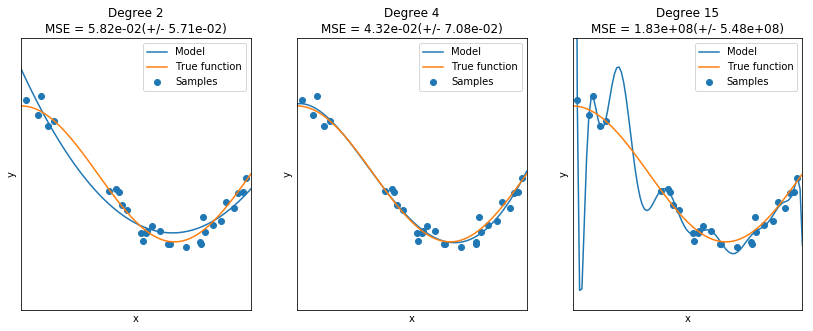

In [54]:
np.random.seed(0)

n_samples = 30
degrees = [2, 4, 15]

true_fun = lambda X: np.cos(1.5 * np.pi * X) # ещё один способ определить функцию: с помощью lambda-функции

# Data Generation
X = np.sort(np.random.rand(n_samples))
y = true_fun(X) + np.random.randn(n_samples) * 0.1

plt.figure(figsize=(14, 5))
for i in range(len(degrees)):
    ax = plt.subplot(1, len(degrees), i + 1)
    plt.setp(ax, xticks=(), yticks=())

    polynomial_features = PolynomialFeatures(degree=degrees[i],
                                             include_bias=False)
    linear_regression = LinearRegression()
    pipeline = Pipeline([("polynomial_features", polynomial_features),
                         ("linear_regression", linear_regression)])
    pipeline.fit(X[:, np.newaxis], y)

    # Evaluate the models using crossvalidation
    scores = model_selection.cross_val_score(pipeline,
        X[:, np.newaxis], y, scoring="neg_mean_squared_error", cv=10)

    X_test = np.linspace(0, 1, 100)
    plt.plot(X_test, pipeline.predict(X_test[:, np.newaxis]), label="Model")
    plt.plot(X_test, true_fun(X_test), label="True function")
    plt.scatter(X, y, label="Samples")
    plt.xlabel("x")
    plt.ylabel("y")
    plt.xlim((0, 1))
    plt.ylim((-2, 2))
    plt.legend(loc="best")
    plt.title("Degree {}\nMSE = {:.2e}(+/- {:.2e})".format(
        degrees[i], -scores.mean(), scores.std()))
plt.show()

<h1 align="center"> Autoregression</h1>

## Data: energy consumption

In [3]:
# Caution: different version of pandas needs differnt codes!!!
#ts = pd.read_csv('custom.csv', sep=',', decimal='.', index_col='Dates', parse_dates=True, dayfirst=True)
ts = pd.read_csv('consumption_train.csv', sep='\t', decimal='.', parse_dates=True, dayfirst=False, index_col='Dates') 

ts.head(24)

,EnergyCons,Dev,WeekDay
Dates,,,
2005-01-01 00:00:00,1290,-11,6
2005-01-01 01:00:00,1266,-12,6
2005-01-01 02:00:00,1273,-13,6
2005-01-01 03:00:00,1280,-14,6
2005-01-01 04:00:00,1293,-15,6
2005-01-01 05:00:00,1263,-16,6
2005-01-01 06:00:00,1279,-16,6
2005-01-01 07:00:00,1304,-16,6
2005-01-01 08:00:00,1330,-16,6


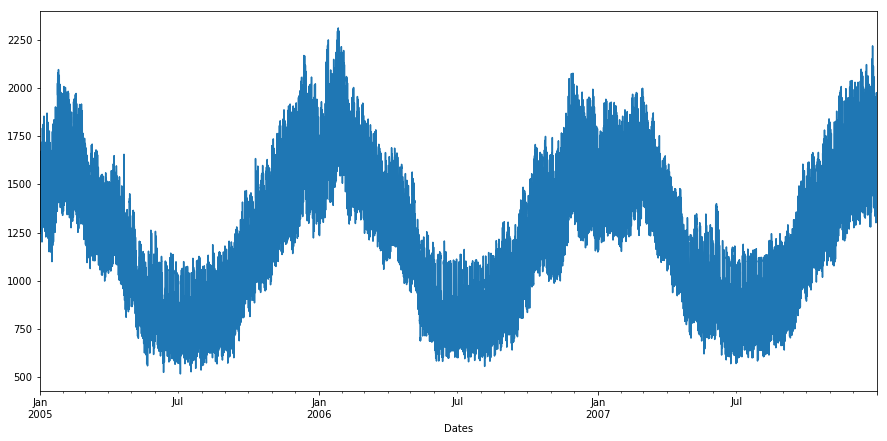

In [3]:
# Plot time series
ts['EnergyCons'].plot(figsize=(15,7))

C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:2: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  from ipykernel import kernelapp as app


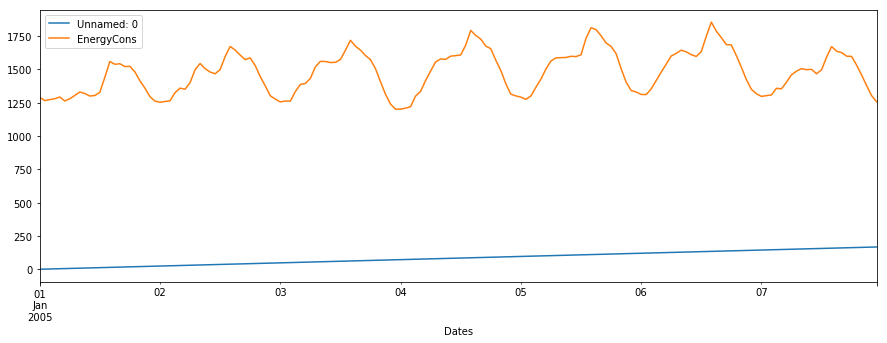

In [14]:
# the first week
ts.ix['2005-01-01 00:00:00':'2005-01-07 23:00:00', range(2)].plot(figsize=(15,5))

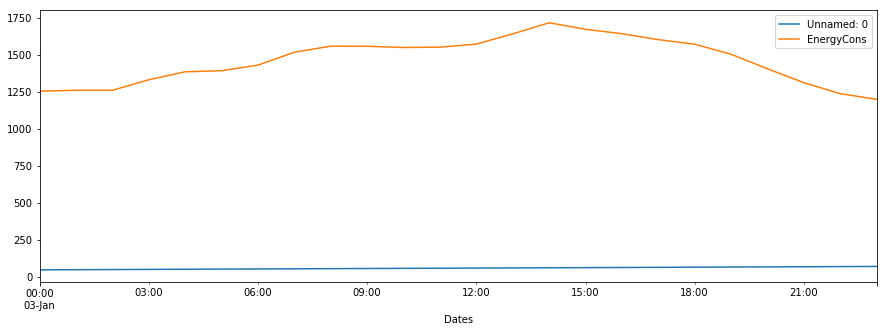

In [15]:
# the first day
ts.ix['2005-01-03 00:00:00':'2005-01-03 23:00:00', range(2)].plot(figsize=(15,5))

## STL-decomposition

In [4]:
import statsmodels.api as sm

C:\Users\Shahane\Anaconda3\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:1: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix
  if __name__ == '__main__':


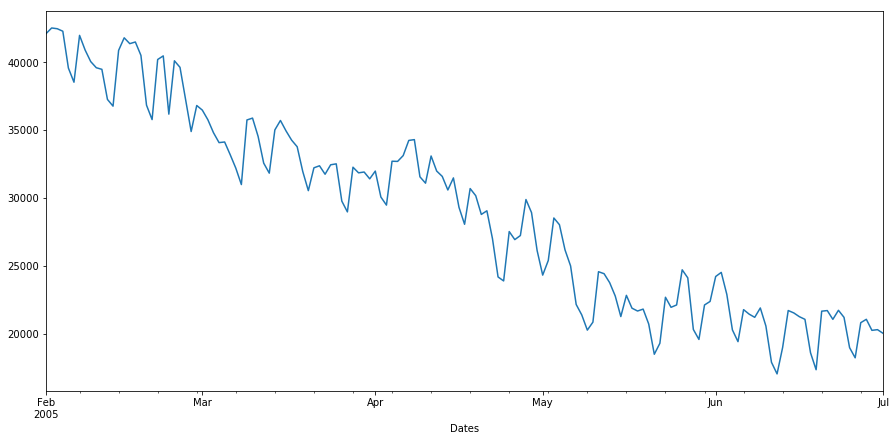

In [17]:
ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum().plot(figsize=(15,7))

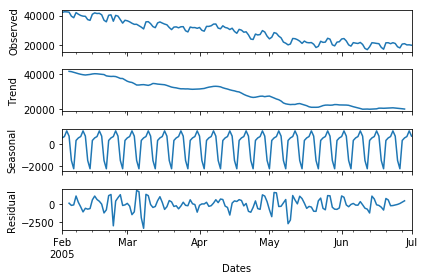

In [18]:
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2005-07-01 23:00'].resample("D").sum())
resplot = res.plot()

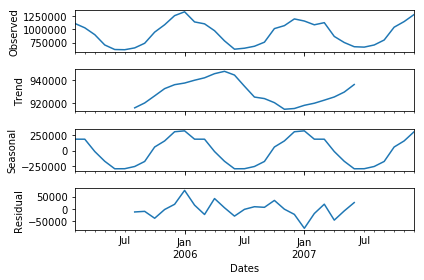

In [19]:
# fig = plt.figure(figsize=(15,10))
res = sm.tsa.seasonal_decompose(ts['EnergyCons'].ix['2005-02-01 00:00':'2008-01-01 23:00'].resample("M").sum())
resplot = res.plot()

## Autoregression: build matrix of autoregression

In [4]:
sc.linalg.hankel([1,2,3,4], [4,7,7,8,9])

array([[1, 2, 3, 4, 7],
       [2, 3, 4, 7, 7],
       [3, 4, 7, 7, 8],
       [4, 7, 7, 8, 9]])

In [5]:
def get_autoregrmatrix(x,h,K):
    L = len(x)
    X = sc.linalg.hankel(x[:L-h-K+1], x[-K:])
    y = x[K+h-1:]
    return X,y

## Forecast for next hour (h=1) using 1 week history (K=168)

In [6]:
K=168
h = 1 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)

C:\Users\Shahane\Anaconda3\lib\site-packages\ipykernel\__main__.py:4: DeprecationWarning: 
.ix is deprecated. Please use
.loc for label based indexing or
.iloc for positional indexing

See the documentation here:
http://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate_ix


In [7]:
print (X_train.shape)
print (y_train.shape)

(8593, 168)
(8593,)


In [8]:
# Matrix of Samples and Regressors
X_train

array([[1290, 1266, 1273, ..., 1377, 1302, 1256],
       [1266, 1273, 1280, ..., 1302, 1256, 1257],
       [1273, 1280, 1293, ..., 1256, 1257, 1267],
       ..., 
       [1332, 1293, 1225, ..., 1541, 1394, 1349],
       [1293, 1225, 1222, ..., 1394, 1349, 1312],
       [1225, 1222, 1278, ..., 1349, 1312, 1284]], dtype=int64)

In [9]:
# Target Vector
y_train

Dates
2005-01-08 00:00:00    1257
2005-01-08 01:00:00    1267
2005-01-08 02:00:00    1274
2005-01-08 03:00:00    1339
2005-01-08 04:00:00    1376
2005-01-08 05:00:00    1400
2005-01-08 06:00:00    1439
2005-01-08 07:00:00    1504
2005-01-08 08:00:00    1557
2005-01-08 09:00:00    1518
2005-01-08 10:00:00    1500
2005-01-08 11:00:00    1501
2005-01-08 12:00:00    1546
2005-01-08 13:00:00    1645
2005-01-08 14:00:00    1718
2005-01-08 15:00:00    1701
2005-01-08 16:00:00    1655
2005-01-08 17:00:00    1635
2005-01-08 18:00:00    1616
2005-01-08 19:00:00    1530
2005-01-08 20:00:00    1435
2005-01-08 21:00:00    1349
2005-01-08 22:00:00    1266
2005-01-08 23:00:00    1247
2005-01-09 00:00:00    1227
2005-01-09 01:00:00    1252
2005-01-09 02:00:00    1250
2005-01-09 03:00:00    1298
2005-01-09 04:00:00    1355
2005-01-09 05:00:00    1384
                       ... 
2005-12-30 19:00:00    1682
2005-12-30 20:00:00    1586
2005-12-30 21:00:00    1484
2005-12-30 22:00:00    1401
2005-12-30 23:

Train score: 0.996, Test score: 0.970


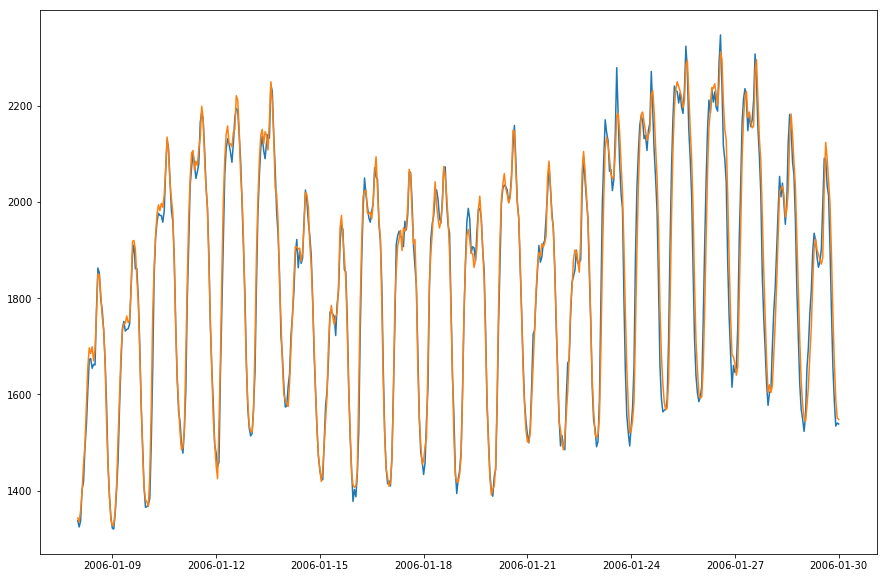

In [10]:
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
plt.figure(figsize=(15,10))
plt.plot(pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}))

## Try another delay: h=168

Train score: 0.934, Test score: 0.871


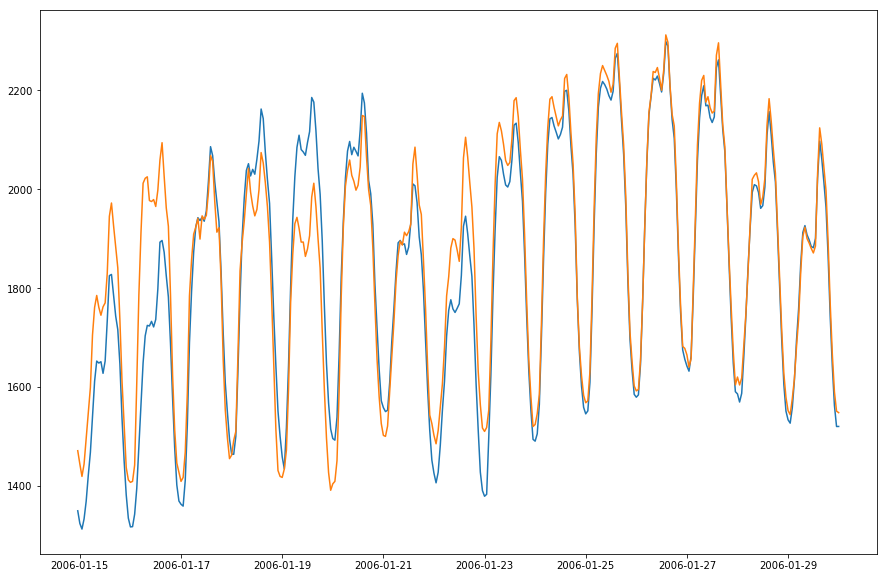

In [11]:
K=168
h = 168 # delay

x_train = ts['EnergyCons'].ix['2005-01-01 00:00:00':'2006-01-01 00:00:00']
x_test = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2006-01-30 00:00:00']

X_train, y_train = get_autoregrmatrix(x_train,h,K)
X_test, y_test = get_autoregrmatrix(x_test,h,K)
linear_regression = LinearRegression()
linear_regression.fit(X_train,y_train)
print('Train score: %.3f, Test score: %.3f'% (linear_regression.score(X_train, y_train), linear_regression.score(X_test, y_test)))
plt.figure(figsize=(15,10))
plt.plot(pd.DataFrame({'ts':y_test, 'frc': linear_regression.predict(X_test)}))


<h1 align="center"> Home Work 0</h1>

## Answer to questions 
 What is time series? 
     
It is a sequence of numerical data points in successive order. (Data points are indexed, listed or graphed in time order)
       
 What is delay and horizon of forecast?
   
For example if we predict the data 2 data points ahead (say, we are given 10 points and we predict the points 11 and 12), this means that the delay is 2. 
Forcasting timeframe is called horizon. 
         
 What is Least Squared Method for Linear Regression?
  
Least squares method is used in statistics and mathematicsan to fit a mathematical or statistical model to data in cases   where the idealized value provided by the model for any data point is expressed linearly in terms of the unknown parameters of the model. 
Its used to fit the data with any function of the form $f(X,\beta) = \beta_0 x_0 + \beta_1 x_1 + ... $. This function is ususally regarded as linear function even those it doesn't have to be a straight line. 
          
 What is the solution of linear regression via LS method (in terms of matrix $X, \alpha, Y$)? 
  
$$
\alpha=\left(X^TX\right)^{-1}X^TY
$$

 Write down main problems of LS method. 
 
When we are dealing with time series with seasonality, the latter is not taken into account in case of least squares. 
When using least squares we make an assumption that the features we are using are independent, which is not always the case. We can easily solve this problem by adding extra features which are the combinations of the initial ones, but when there are a lot of features noone got time for that lol. 
Also Least Squares requires us to invert the sample covariance matrix $(X^TX)^{-1}$, which may not be possible.
          
 What is the hankel transformation of a matrix? 
  
It is an infinite matrix H with elements $h_i = a_{i+j-1}$. The Hankel matrix $H_n$ of order n of A is the upper-left $n \times n$ submatrix of H, and $h_n$, the Hankel determinant of order n of A, is the determinant of the
corresponding Hankel matrix of order n, $h_n = det(H_n)$. The Hankel transform of matrix is an integral transform equivalent to a two-dimensional Fourier transform with a radially symmetric integral kernel and also called the Fourier-Bessel transform.
          

## Practical Task
Draw dependence of the cross_validation score (linear_regression.score) on the horizon of the forecast for LR model in the case of energy consumption forecasting. You should write code to show dependence for $h=1,2,\dots, 720$. You can choose amount of regressors fo LR in experiment as much as you want.   

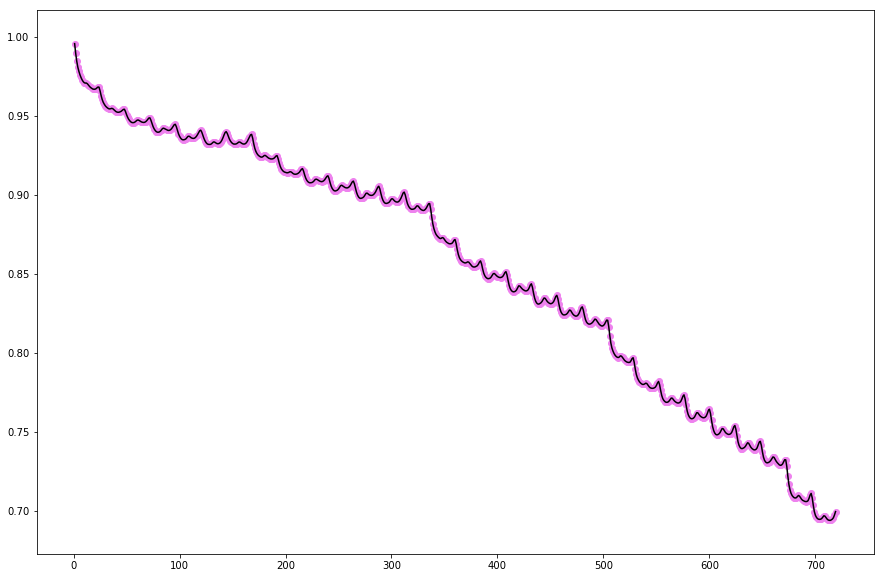

In [12]:
# Solution wirte there
#linear_regression.score(X_test,y_test)
from mpl_toolkits.mplot3d import axes3d
K=168
#delay
h = 720

plt.figure(figsize=(15,10))
def cross_val(K,h):

    h_s = list(range(1,h))
    y_list = []
    x_train = ts['EnergyCons'].ix['2006-01-01 00:00:00':'2007-01-01 00:00:00']
    x_test = ts['EnergyCons'].ix['2007-01-01 00:00:00':'2008-01-30 00:00:00']
    for i in range(len(h_s)):
        X_train, y_train = get_autoregrmatrix(x_train,h_s[i],K)
        X_test, y_test = get_autoregrmatrix(x_test,h_s[i],K)
        linear_regression = LinearRegression()
        linear_regression.fit(X_train,y_train)
        y_list.append(linear_regression.score(X_test,y_test))
        #plt.scatter(h_s[i],linear_regression.score(X_test,y_test), COLOR = 'BLUE')
        #plt.plot(h_s[i],linear_regression.score(X_test,y_test),COLOR = 'BLUE')
    #plt.show()
    return h_s,y_list

x_l, y_l = cross_val(K,h)
plt.scatter(x_l,y_l, COLOR = 'violet')
plt.plot(x_l,y_l,COLOR = 'black')
plt.show()